In [163]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import numpy as np
from pandas import DataFrame, read_csv, Series
import cv2, re, random
from sklearn.preprocessing import LabelEncoder

In [ ]:
os.getcwd()

In [14]:
base = 'C:/Users/us36141/jupyter/tensorflow'
train_dir = os.path.join(str(base)+ '/dataset/train/')
test_dir = os.path.join(str(base)+'/dataset/test/')

In [15]:
train_dir

'C:/Users/us36141/jupyter/tensorflow/dataset/train/'

In [16]:
train_fnames = os.listdir(train_dir)
test_fnames = os.listdir(test_dir)

print(train_fnames[:10])
print(test_fnames[:10])

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']
['108.jpg', '11.jpg', '110.jpg', '112.jpg', '114.jpg', '119.jpg', '125.jpg', '128.jpg', '129.jpg', '13.jpg']


In [ ]:
train_images = [train_dir+i for i in os.listdir(train_dir)]
test_images = [test_dir+i for i in os.listdir(test_dir)]

In [5]:
train_fnames[0]

'1.jpg'

In [17]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [18]:
train_fnames.sort(key=natural_keys)

In [19]:
train_fnames[:9]

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '7.jpg',
 '8.jpg',
 '10.jpg',
 '12.jpg']

In [82]:
test_fnames.sort(key=natural_keys)

In [83]:
test_fnames[:9]

['6.jpg',
 '9.jpg',
 '11.jpg',
 '13.jpg',
 '14.jpg',
 '17.jpg',
 '20.jpg',
 '23.jpg',
 '28.jpg']

In [110]:
img_width = 150
img_height = 150

In [78]:
def prepare_data(list_of_images, train_labels, train_dir):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(train_dir+image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))

        if image in list(train_label['Image']):
            y.append(train_label.loc[train_label['Image'] == image, 'target'].values[0])
    
            
    return x, y

In [81]:
def test_data_prepare(list_of_images, test_dir):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(test_dir+image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))    
            
    return x

In [54]:
train_label = read_csv('dataset/train.csv')
test_label = read_csv('dataset/test.csv')

In [12]:
print(train_label.head())
print(test_label.head())

     Image         target
0   96.jpg       manipuri
1  163.jpg  bharatanatyam
2  450.jpg         odissi
3  219.jpg      kathakali
4  455.jpg         odissi
     Image
0  508.jpg
1  246.jpg
2  473.jpg
3  485.jpg
4  128.jpg


In [46]:
print(train_label.dtypes)
if '1.jpg' in str(train_label['Image']):
    print('yes')

Image     object
target    object
dtype: object
yes


In [79]:
training_img, training_labels = prepare_data(train_fnames, train_label, train_dir)

In [84]:
testing_img = test_data_prepare(test_fnames, test_dir)

In [86]:
testing_img[0].shape

(150, 150, 3)

In [80]:
len(training_img), len(training_labels)

(364, 364)

In [115]:
train_samples = len(training_img)
batch_size = 32

In [75]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15,15))
    for n in range(49):
        ax = plt.subplot(7,7,n+1)
        plt.imshow(image_batch[n])
        plt.title(label_batch[n].title())
        plt.axis('off')

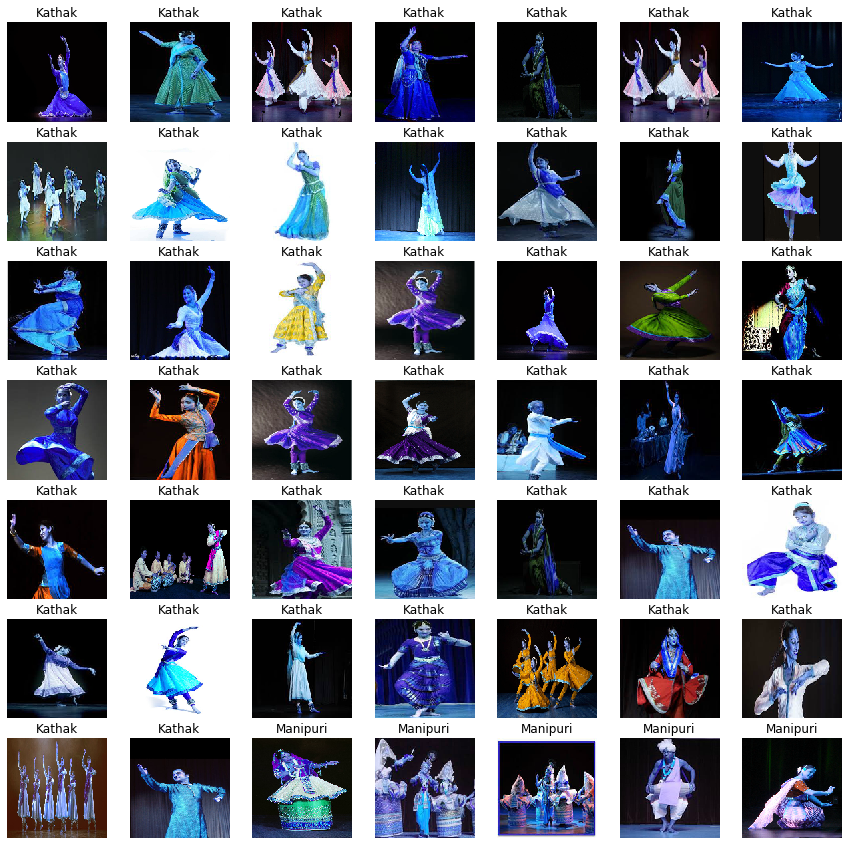

In [76]:
show_batch(training_img, training_labels)

In [142]:
model = keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu',input_shape= (img_width, img_height, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(5,5), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
])



In [143]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 512)      

In [97]:
le =LabelEncoder()
training_labels=le.fit_transform(training_labels)

In [125]:
training_labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [101]:
image_generator = ImageDataGenerator(rescale= 1./255.)

In [148]:
# With data augmentation to prevent overfitting (accuracy 0.99286)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.4, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(training_img)
train_generator = datagen.flow(np.array(training_img), training_labels, batch_size=batch_size)

In [151]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.5,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.5,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    horizontal_flip=True)

In [144]:
train_generator = train_datagen.flow(np.array(training_img), training_labels, batch_size=batch_size)
#test_generator = val_datagen.flow(np.array(X_val), Y_val, batch_size=batch_size)

In [145]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [149]:
history = model.fit(
    train_generator, 
    steps_per_epoch=train_samples // batch_size,
    epochs=30,
    callbacks=[learning_rate_reduction]
)

  ...
    to  
  ['...']
Train for 11 steps
Epoch 1/30
11/11 [==============================] - 11s 971ms/step - loss: 17216909470025170.0000 - accuracy: 0.1705
Epoch 2/30
11/11 [==============================] - 10s 929ms/step - loss: 19055817435919732.0000 - accuracy: 0.1687
Epoch 3/30
11/11 [==============================] - 11s 991ms/step - loss: 21434776395059844.0000 - accuracy: 0.1446
Epoch 4/30
11/11 [==============================] - 11s 1s/step - loss: 25905022643196612.0000 - accuracy: 0.1386
Epoch 5/30
11/11 [==============================] - 12s 1s/step - loss: 30922693842425040.0000 - accuracy: 0.1627
Epoch 6/30
11/11 [==============================] - 12s 1s/step - loss: 32530200433065724.0000 - accuracy: 0.1295
Epoch 7/30
11/11 [==============================] - 12s 1s/step - loss: 34675146709961636.0000 - accuracy: 0.1591
Epoch 8/30
11/11 [==============================] - 11s 1s/step - loss: 40143132785707856.0000 - accuracy: 0.1386
Epoch 9/30
11/11 [=================

In [152]:
test_generator = test_datagen.flow(np.array(testing_img), batch_size=batch_size)
prediction_probabilities = model.predict_generator(test_generator, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
5/5 [==============================] - 1s 269ms/step


In [156]:
res = np.argmax(prediction_probabilities,axis = 1)
res = Series(res, name="Label")

In [158]:
target=le.inverse_transform(res)

In [160]:
output= DataFrame({'Image':test_fnames, 'target':target})

In [161]:
output.head()

,Image,target
0,6.jpg,kathak
1,9.jpg,kathak
2,11.jpg,kathak
3,13.jpg,kathak
4,14.jpg,kathak


In [164]:
output.to_csv('output.csv', index=False)